# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [9]:
from numpy import *
import random as rnd
from skimage.transform import resize
import matplotlib.pyplot as plt 
import skimage
from makeLMfilters import makeLMfilters
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from sklearn.cluster import KMeans
import collections

In [10]:
#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#calculate the distance of Euclid between two vectors
def euclid(vec1,vec2):
    return sqrt(sum(power(vec1-vec2,2)))

def initCentroids(dataset,k):
    dataset = list(dataset)
    return rnd.sample(dataset,k)

def minDistance(dataSet, centroidList, mydic):
    dic=collections.defaultdict(list)
    pos=collections.defaultdict(list)
    k=len(centroidList)
    for index,item in enumerate(dataSet):
        vec1=item
        flag=-1
        minDis=float("inf")
        for i in range(k):
            vec2=centroidList[i]
            distance=euclid(array(vec1),array(vec2))
            if distance < minDis:
                minDis=distance
                flag=i
        dic[flag].append(item)
        pos[flag].append(mydic[index])
        
    return dic,pos

def getVar(centroidList, clusterDict):
    total=0.0
    for key in clusterDict:
        vec1=centroidList[key]
        distance=0.0
        for item in clusterDict[key]:
            vec2=item
            distance+=euclid(array(vec1),array(vec2))
        total+=distance
    return total

def getCentroids(clusterDict):
    centroidList = []
    for key in clusterDict:
        centroid=mean(array(clusterDict[key]),axis=0)
        centroidList.append(centroid)
    return centroidList
    
    
def convolve(Img,f):
    
    row=len(f)//2
    col=len(f[0])//2
    
    image=[[0 for _ in range(len(Img[0])+col*2)]for _ in range(len(Img)+row*2)]
    
    for i in range(row,len(image)-row):
        for j in range(col,len(image[0])-col):
            image[i][j]=Img[i-row][j-col]
    
    g=matrix(f)
    cut=matrix(image)
    simg=[[0 for _ in range(len(Img[0]))] for _ in range(len(Img))]
    
    for m in range(row,len(image)-row):
        for n in range(col,len(image[0])-col):
            if len(f)%2==0 and len(f[0])%2!=0: 
                tmp=cut[m-row:m+row,n-col:n+col+1]
            elif len(f)%2!=0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row+1,n-col:n+col]
            elif len(f)%2==0 and len(f[0])%2==0:
                tmp=cut[m-row:m+row,n-col:n+col]
            else:
                tmp=cut[m-row:m+row+1,n-col:n+col+1]
    
            mid=multiply(g,tmp)
            total=sum(mid)
            simg[m-row][n-col]=total
    return simg

def mykmeans(responses,rows,cols,k):
    multiarray=[]
    for i in range(len(responses)):
        for j in range(len(responses[0])):
            cur=[]
            for n in range(len(responses[0][0])):
                cur.append(responses[i][j][n])
            multiarray.append(cur)
    
    
    idx=[[None for _ in range(cols)] for _ in range(rows)]
    
    mydic={}
    count=0
    for i in range(rows):
        for j in range(cols):
            mydic[count]=(i,j)
            count+=1
            
    centroidList = initCentroids(multiarray, k)
    clusterDict, pos = minDistance(multiarray, centroidList, mydic)
    newVar = getVar(centroidList, clusterDict)
    oldVar = 1
    times = 2
    while abs(newVar - oldVar) >= 0.001:
        centroidList = getCentroids(clusterDict)
        clusterDict, pos = minDistance(multiarray, centroidList ,mydic)
        oldVar = newVar
        newVar = getVar(centroidList, clusterDict)
        times += 1
    for key,values in pos.items():
        for val in values:
            x,y=val
            idx[x][y]=key
    return idx

def myOwnKmeans(imgFilename, k):
     #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    '****Put your code here.'
    #Convert the image to grayscale
    img=load_img(imgFilename)
    grayimg=skimage.color.rgb2gray(img)
    plt.imshow(img)
    plt.show()
    rows,cols=grayimg.shape
    
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    '****Put your code here.'
    M=makeLMfilters()
    num_filters=len(M[0][0])
    
    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    '****Put your code here.'
    responses=zeros((rows,cols,num_filters))
    
    for m in range(len(M[0][0])):
        gfilter=M[:,:,m]
        tmp=convolve(grayimg,gfilter)
        a=abs(array(tmp))
        tmp=list(a)
        for i in range(len(tmp)):
            for j in range(len(tmp[0])):   
                responses[:,:,m][i][j]=tmp[i][j]
                
    idx=mykmeans(responses,rows,cols,k)
    idx=uint8(idx)
    print('***Segmentation done***')
    return idx
    
    

#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFilename, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    '****Put your code here.'
    #Convert the image to grayscale
    img=load_img(imgFilename)
    grayimg=skimage.color.rgb2gray(img)
    plt.imshow(img)
    plt.show()
    
    rows,cols=grayimg.shape

    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    '****Put your code here.'
    M=makeLMfilters()
    num_filters=len(M[0][0])

    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    '****Put your code here.'
    responses=zeros((rows,cols,num_filters))
    
    for m in range(len(M[0][0])):
        gfilter=M[:,:,m]
        tmp=convolve(grayimg,gfilter)
        a=abs(array(tmp))
        tmp=list(a)
        for i in range(len(tmp)):
            for j in range(len(tmp[0])):   
                responses[:,:,m][i][j]=tmp[i][j]

    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    '****Put your code here.'
    X=reshape(responses,(rows*cols,num_filters))

    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    '****Put your code here.'
    kmean=KMeans(k, random_state=1)
    idx=kmean.fit(X).labels_
    
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx=reshape(idx,(rows,cols))
    idx=uint8(idx)
    
    print('***Segmentation done***')
    return idx




In [11]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
#     idxImg = idxImg[25:rows-25, 25:cols-25]
#     sImg = sImg[25:rows-25, 25:cols-25]
#     rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = 255*resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True)
    idxImg = idxImg.astype(uint8)
    sImg = 255*resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True)
    sImg = sImg.astype(uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+200
                jOff = j+100 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    plt.imshow(tImg)
    plt.show()
    return tImg


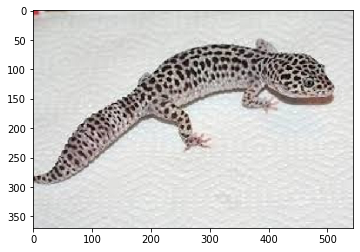

***Segmentation done***
***transfer done


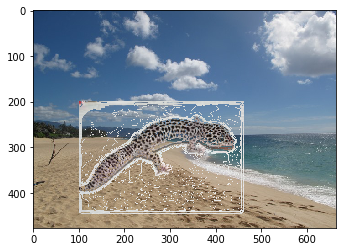

In [12]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
#


'****** my own kmeans ******'
# idx = myOwnKmeans('dog.jpg', 4)
# trImg = transferImg([0,1,2,3], idx, 'dog.jpg', 'bg.jpg')
'****** my own kmeans ******'



idx = segmentImg('gecko.jpg', 23)
# Insert only the numbers that correspond to the foreground labels in the transferImg function
trImg = transferImg([2,3,4,5,7,8,9,10,11,13,14,15,16,17,18,20,21,22], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([1], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([2], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([3], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([4], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([5], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([6], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([7], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([8], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([9], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([10], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([11], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([12], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([13], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([14], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([15], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([16], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([17], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([18], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([19], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([20], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([21], idx, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([22], idx, 'gecko.jpg', 'bg.jpg')


 

In [13]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClr(imgFilename, k, color):
    '****Put your code here.'
    image=load_img(imgFilename)
    grayimage=image
    if color=="HSV":
        grayimage=skimage.color.rgb2hsv(image)
    elif color=="LAB":
        grayimage=skimage.color.rgb2lab(image)
    elif color=="RGB":
        grayimage=image


    X=reshape(grayimage,(image.shape[0] * image.shape[1], image.shape[2]))

    kmean=KMeans(n_clusters=k, random_state=1)
    idx=kmean.fit(X).labels_
    idx=reshape(idx,(image.shape[0],image.shape[1]))
    idx=uint8(idx)
    
    print('***Segmentation done***')
    return idx


//anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
//anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
//anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


***Segmentation done***
***transfer done


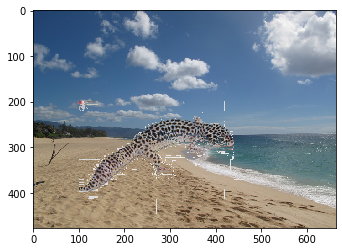

In [14]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
index = segmentImgClr('gecko.jpg', 9, 'HSV')
trImg = transferImg([1,2,3,6,7,8], index, 'gecko.jpg', 'bg.jpg')#with HSV
# trImg = transferImg([1], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([2], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([3], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([4], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([5], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([6], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([7], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([8], index, 'gecko.jpg', 'bg.jpg')




***Segmentation done***
***transfer done


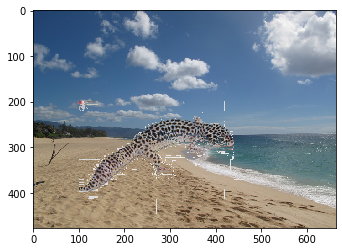

In [15]:
#10 Test with a different colorspace
idx = segmentImgClr('gecko.jpg', 9, 'RGB')
trImg = transferImg([1,2,3,6,7,8], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([1], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([2], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([3], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([4], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([5], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([6], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([7], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([8], index, 'gecko.jpg', 'bg.jpg')

***Segmentation done***
***transfer done


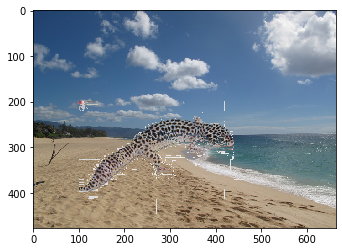

In [16]:
idx = segmentImgClr('gecko.jpg', 9, 'LAB')
trImg = transferImg([1,2,3,6,7,8], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([1], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([2], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([3], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([4], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([5], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([6], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([7], index, 'gecko.jpg', 'bg.jpg')
# trImg = transferImg([8], index, 'gecko.jpg', 'bg.jpg')